In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [371]:
df = pd.read_csv("/content/top_1000_instagrammers.csv")

In [372]:
df.shape

(1000, 7)

In [373]:
df.head()


,Name,Rank,Category,Followers,Audience Country,Authentic Engagement,Engagement Avg.
0,cristiano,1,Sports with a ball,462.9M,India,5.5M,6.6M
1,leomessi,2,Sports with a ballFamily,347.2M,Argentina,3.6M,4.8M
2,kendalljenner,3,ModelingFashion,247.6M,United States,3M,4.9M
3,arianagrande,4,Music,321.4M,United States,2.4M,3.4M
4,zendaya,5,Cinema & Actors/actressesFashion,147M,United States,4.3M,5.8M


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  1000 non-null   object
 1   Rank                  1000 non-null   int64 
 2   Category              916 non-null    object
 3   Followers             1000 non-null   object
 4   Audience Country      986 non-null    object
 5   Authentic Engagement  1000 non-null   object
 6   Engagement Avg.       1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [375]:
df.isna().sum()

Name                     0
Rank                     0
Category                84
Followers                0
Audience Country        14
Authentic Engagement     0
Engagement Avg.          0
dtype: int64

In [376]:
df["Category"].fillna("Unknown", inplace=True)

In [377]:
df["Audience Country"].fillna("Unknown",inplace=True)

In [378]:
df.sample(2)

,Name,Rank,Category,Followers,Audience Country,Authentic Engagement,Engagement Avg.
183,justintimberlake,184,MusicArt/ArtistsCinema & Actors/actresses,65.5M,United States,226.5K,299.5K
632,f1,633,Racing Sports,19.8M,Italy,150.8K,191.7K


In [379]:
# replace M with 10000000
df["Followers"] = df["Followers"].str.replace("K","000").str.replace("M", "000000")
df['Followers'] = df['Followers'].str.replace(".", "")
df['Followers'] = df['Followers'].astype(int)

In [380]:
df.head()

,Name,Rank,Category,Followers,Audience Country,Authentic Engagement,Engagement Avg.
0,cristiano,1,Sports with a ball,4629000000,India,5.5M,6.6M
1,leomessi,2,Sports with a ballFamily,3472000000,Argentina,3.6M,4.8M
2,kendalljenner,3,ModelingFashion,2476000000,United States,3M,4.9M
3,arianagrande,4,Music,3214000000,United States,2.4M,3.4M
4,zendaya,5,Cinema & Actors/actressesFashion,147000000,United States,4.3M,5.8M


In [381]:
df["Authentic Engagement"] = df["Authentic Engagement"].str.replace("K","000").str.replace("M", "000000")
df['Authentic Engagement'] = df['Authentic Engagement'].str.replace(".", "")
df['Authentic Engagement'] = df['Authentic Engagement'].astype(int)

In [382]:
df["Engagement Avg."] = df["Engagement Avg."].str.replace("K","000").str.replace("M", "000000")
df['Engagement Avg.'] = df['Engagement Avg.'].str.replace(".", "")
df['Engagement Avg.'] = df['Engagement Avg.'].astype(int)

<Axes: title={'center': 'Top 10 Instagrammers and their Followers'}, xlabel='Name'>

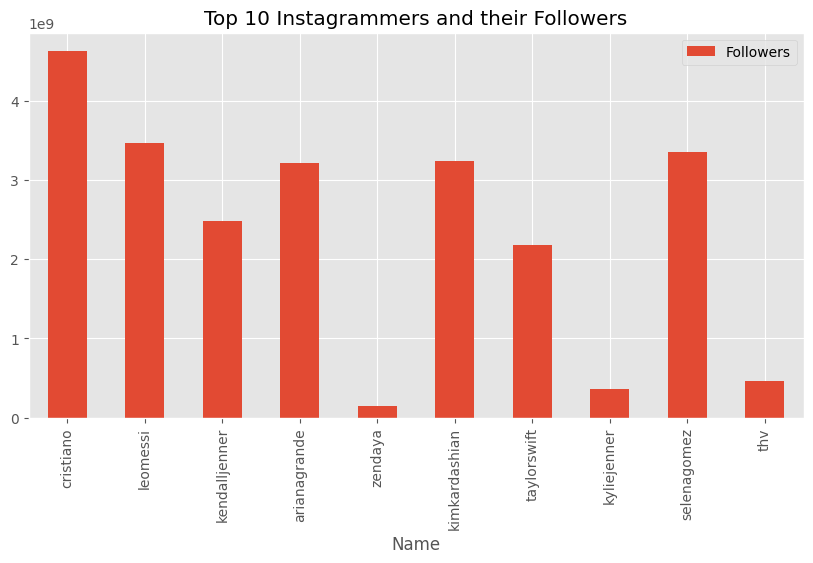

In [383]:
df.head(10).plot(kind="bar", x="Name", y="Followers", figsize=(10, 5),title="Top 10 Instagrammers and their Followers")

<Axes: title={'center': 'Top 10 Instagrammers and their Authentic Engagement'}, xlabel='Name'>

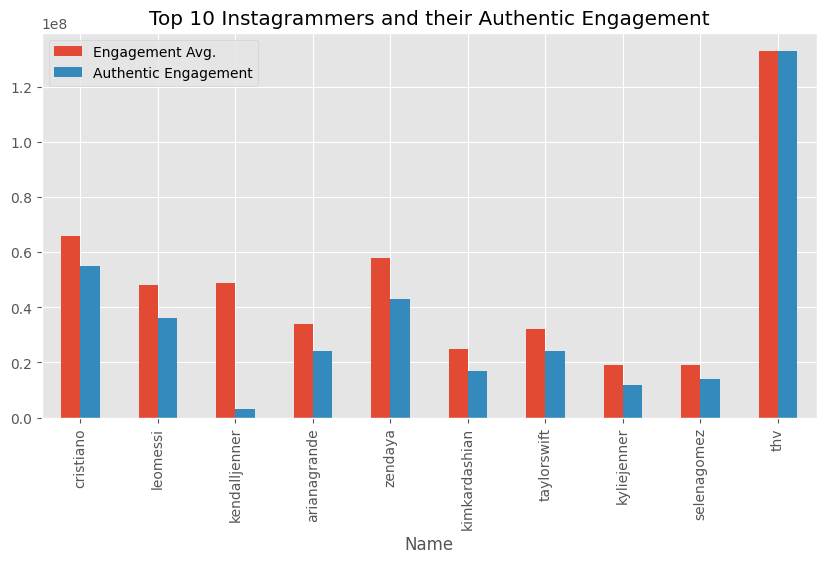

In [384]:
df.head(10).plot(kind="bar", x="Name", y=["Engagement Avg.","Authentic Engagement"], figsize=(10, 5),title="Top 10 Instagrammers and their Authentic Engagement")

In [385]:
df["suspecious engagement"] = df["Engagement Avg."] - df["Authentic Engagement"]

In [386]:
df.head()

,Name,Rank,Category,Followers,Audience Country,Authentic Engagement,Engagement Avg.,suspecious engagement
0,cristiano,1,Sports with a ball,4629000000,India,55000000,66000000,11000000
1,leomessi,2,Sports with a ballFamily,3472000000,Argentina,36000000,48000000,12000000
2,kendalljenner,3,ModelingFashion,2476000000,United States,3000000,49000000,46000000
3,arianagrande,4,Music,3214000000,United States,24000000,34000000,10000000
4,zendaya,5,Cinema & Actors/actressesFashion,147000000,United States,43000000,58000000,15000000


In [387]:
df["Category"].value_counts()

Category
Music                                                           167
Cinema & Actors/actresses                                       149
Sports with a ball                                              105
Unknown                                                          84
Lifestyle                                                        77
Modeling                                                         19
Shows                                                            19
MusicCinema & Actors/actresses                                   19
Humor & Fun & Happiness                                          15
LifestyleMusic                                                   13
Beauty                                                           13
Cinema & Actors/actressesLifestyle                               13
Fitness & Gym                                                    12
ShowsCinema & Actors/actresses                                    9
MusicArt/Artists                       

<Axes: title={'center': 'Top 15 Categories'}, xlabel='Category'>

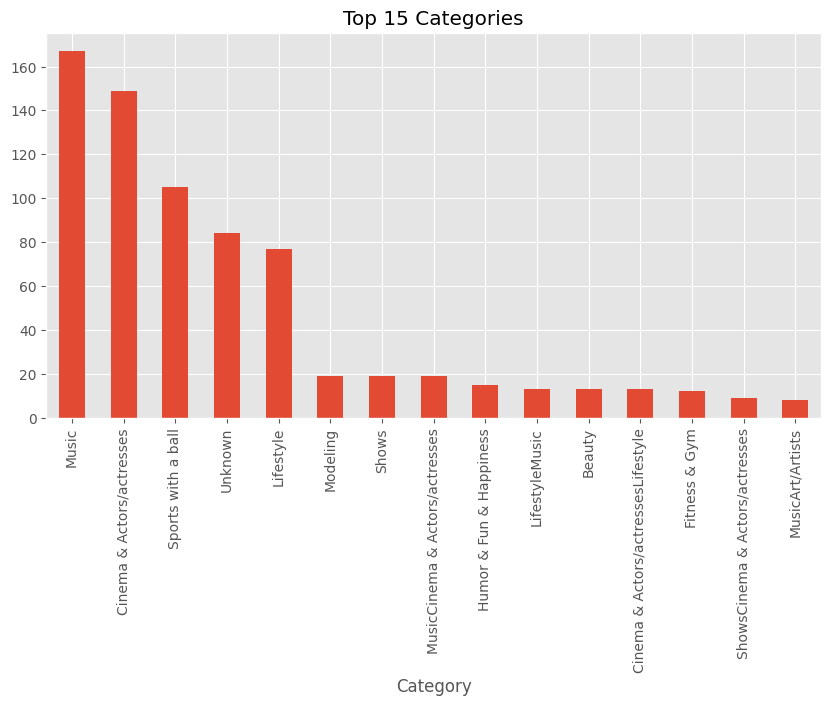

In [388]:
df["Category"].value_counts().head(15).plot(kind="bar", figsize=(10, 5),title="Top 15 Categories")

In [389]:
# top 10 influencers and their major target demographic
df.sort_values(by="Followers", ascending=False).head(20)[["Name", "Audience Country"]]

,Name,Audience Country
28,instagram,India
0,cristiano,India
1,leomessi,Argentina
8,selenagomez,United States
40,therock,India
5,kimkardashian,United States
3,arianagrande,United States
17,beyonce,United States
18,khloekardashian,United States
2,kendalljenner,United States


<Axes: title={'center': 'Top 20 Influencers and their Major Target Demographic'}, ylabel='count'>

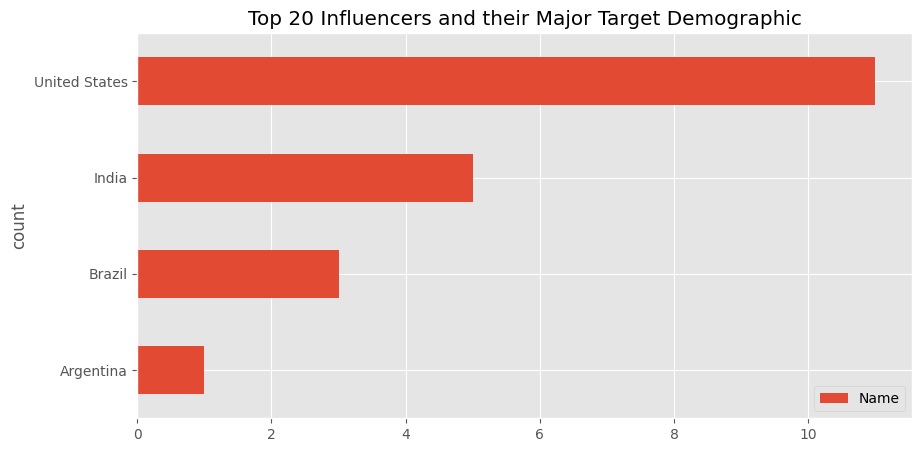

In [390]:
# plot top demographic for top 20 influencers
df.sort_values(by="Followers", ascending=False).head(20)[["Name", "Audience Country"]].groupby("Audience Country").count().plot(\
kind="barh", figsize=(10, 5),ylabel="count", title="Top 20 Influencers and their Major Target Demographic")

In [391]:
df.head(2)

,Name,Rank,Category,Followers,Audience Country,Authentic Engagement,Engagement Avg.,suspecious engagement
0,cristiano,1,Sports with a ball,4629000000,India,55000000,66000000,11000000
1,leomessi,2,Sports with a ballFamily,3472000000,Argentina,36000000,48000000,12000000


In [392]:
df["Audience Country"].value_counts().head(10)

Audience Country
United States    277
India            159
Brazil           145
Indonesia        136
Mexico            40
Spain             34
Russia            26
Argentina         23
Iran              21
Turkey            20
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 Countries'}, xlabel='Audience Country'>

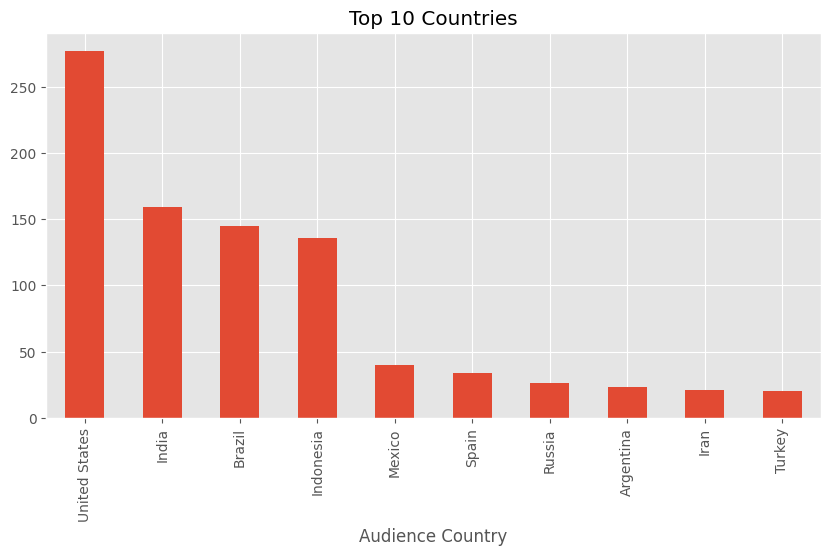

In [393]:
# countries that are top contributors for top intagram influencer
df["Audience Country"].value_counts().head(10).plot(kind="bar", figsize=(10, 5),title="Top 10 Countries")

In [394]:
df.head()

,Name,Rank,Category,Followers,Audience Country,Authentic Engagement,Engagement Avg.,suspecious engagement
0,cristiano,1,Sports with a ball,4629000000,India,55000000,66000000,11000000
1,leomessi,2,Sports with a ballFamily,3472000000,Argentina,36000000,48000000,12000000
2,kendalljenner,3,ModelingFashion,2476000000,United States,3000000,49000000,46000000
3,arianagrande,4,Music,3214000000,United States,24000000,34000000,10000000
4,zendaya,5,Cinema & Actors/actressesFashion,147000000,United States,43000000,58000000,15000000


In [395]:
df['Category'].unique()

array(['Sports with a ball', 'Sports with a ballFamily',
       'ModelingFashion', 'Music', 'Cinema & Actors/actressesFashion',
       'FashionBeauty', 'FashionModelingBeauty', 'MusicLifestyle',
       'Unknown', 'Cinema & Actors/actresses', 'Lifestyle',
       'MusicFashion', 'Clothing & OutfitsLifestyle', 'MusicBeauty',
       'Art/ArtistsCinema & Actors/actressesMusic', 'Photography',
       'ModelingLifestyle', 'MusicCinema & Actors/actresses',
       'Cinema & Actors/actressesFitness & Gym',
       'LifestyleFashionClothing & Outfits', 'Beauty', 'Art/Artists',
       'Finance & EconomicsBusiness & Careers',
       'Cinema & Actors/actressesMusic', 'LifestyleShows',
       'Cinema & Actors/actressesModelingLifestyle',
       'ModelingLifestyleBeauty',
       'BeautyArt/ArtistsCinema & Actors/actresses',
       'Cinema & Actors/actressesLifestyle', 'LifestyleMusic', 'Modeling',
       'LifestyleModeling', 'ModelingFamily', 'SciencePhotography',
       'MusicModeling', 'Cinema & Acto

In [396]:
df[df["Category"] == "Food & Cooking"]

,Name,Rank,Category,Followers,Audience Country,Authentic Engagement,Engagement Avg.,suspecious engagement
178,cznburak,179,Food & Cooking,37000000,Turkey,4185000,5662000,1477000
516,nusr_et,517,Food & Cooking,469000000,Turkey,736000,1086000,350000
572,amauryguichon,573,Food & Cooking,9000000,United States,4072000,4972000,900000


<Axes: title={'center': 'Top Instagram Influencers in Food & Cooking'}, xlabel='Name'>

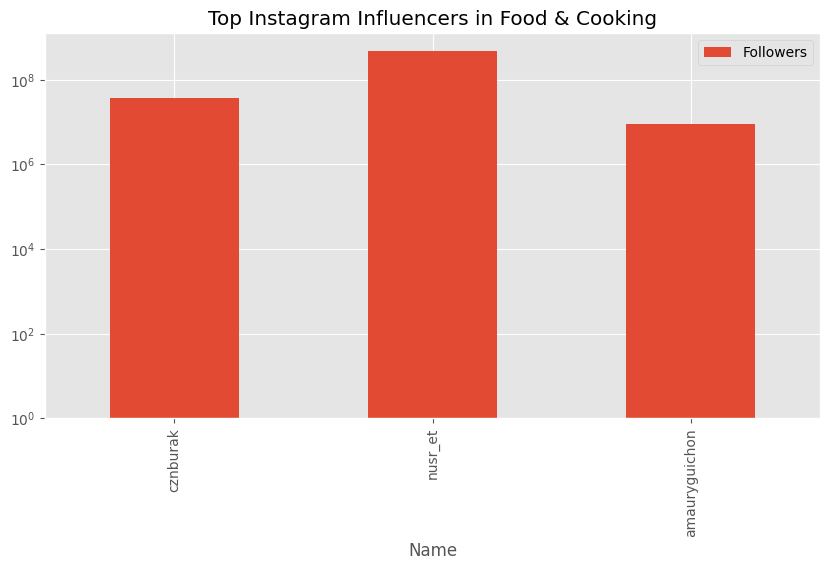

In [397]:
df[df["Category"] == "Food & Cooking"].plot(kind="bar", x="Name", y="Followers", figsize=(10, 5),title="Top Instagram Influencers in Food & Cooking", log=True)

In [398]:
df.head()

,Name,Rank,Category,Followers,Audience Country,Authentic Engagement,Engagement Avg.,suspecious engagement
0,cristiano,1,Sports with a ball,4629000000,India,55000000,66000000,11000000
1,leomessi,2,Sports with a ballFamily,3472000000,Argentina,36000000,48000000,12000000
2,kendalljenner,3,ModelingFashion,2476000000,United States,3000000,49000000,46000000
3,arianagrande,4,Music,3214000000,United States,24000000,34000000,10000000
4,zendaya,5,Cinema & Actors/actressesFashion,147000000,United States,43000000,58000000,15000000


In [399]:
df[df["Category"] == "Fashion"]

,Name,Rank,Category,Followers,Audience Country,Authentic Engagement,Engagement Avg.,suspecious engagement
504,donya,505,Fashion,152000000,Iran,2314000,3664000,1350000
931,themermaidscales,932,Fashion,66000000,India,274000,338000,64000


In [402]:
df[df["Audience Country"] == "India"].head()

,Name,Rank,Category,Followers,Audience Country,Authentic Engagement,Engagement Avg.,suspecious engagement
0,cristiano,1,Sports with a ball,4629000000,India,55000000,66000000,11000000
12,virat.kohli,13,Sports with a ball,2069000000,India,21000000,24000000,3000000
22,khaby00,23,Sports with a ball,786000000,India,28000000,39000000,11000000
23,justinbieber,24,Music,2459000000,India,7985000,12000000,4015000
28,instagram,29,Photography,5284000000,India,3396000,4343000,947000


<Axes: title={'center': 'Top Instagram Influencers in India'}, xlabel='Name'>

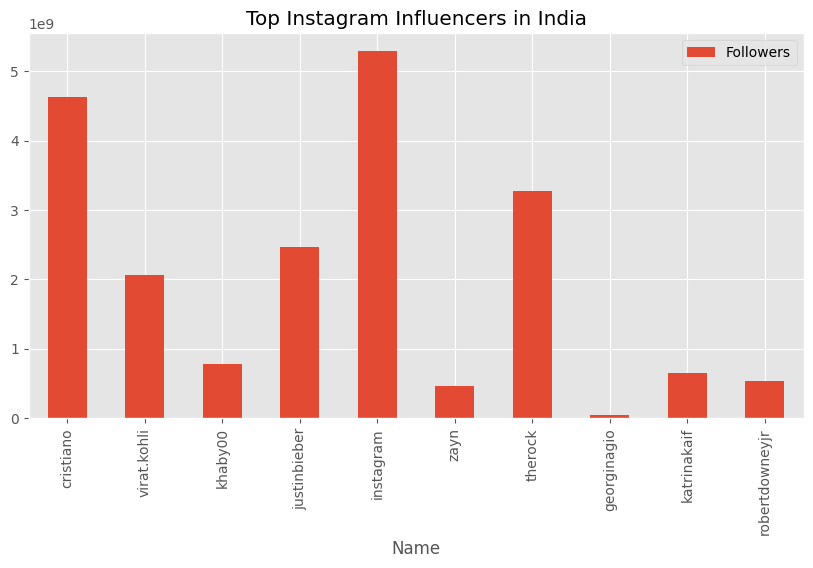

In [404]:
df[df["Audience Country"] == "India"].head(10).plot(kind="bar", x="Name", y="Followers", \
                                                    figsize=(10, 5),title="Top Instagram Influencers in India")

In [405]:
df.head()

,Name,Rank,Category,Followers,Audience Country,Authentic Engagement,Engagement Avg.,suspecious engagement
0,cristiano,1,Sports with a ball,4629000000,India,55000000,66000000,11000000
1,leomessi,2,Sports with a ballFamily,3472000000,Argentina,36000000,48000000,12000000
2,kendalljenner,3,ModelingFashion,2476000000,United States,3000000,49000000,46000000
3,arianagrande,4,Music,3214000000,United States,24000000,34000000,10000000
4,zendaya,5,Cinema & Actors/actressesFashion,147000000,United States,43000000,58000000,15000000


In [409]:
df[df["Audience Country"] == "United States"].sort_values(by="Followers", ascending=False).head(10)

,Name,Rank,Category,Followers,Audience Country,Authentic Engagement,Engagement Avg.,suspecious engagement
8,selenagomez,9,MusicLifestyle,3349000000,United States,14000000,19000000,5000000
5,kimkardashian,6,FashionBeauty,3236000000,United States,17000000,25000000,8000000
3,arianagrande,4,Music,3214000000,United States,24000000,34000000,10000000
17,beyonce,18,MusicFashion,2674000000,United States,9499000,13000000,3501000
18,khloekardashian,19,Clothing & OutfitsLifestyle,2604000000,United States,11000000,14000000,3000000
2,kendalljenner,3,ModelingFashion,2476000000,United States,3000000,49000000,46000000
141,natgeo,142,Nature & landscapesSciencePhotography,2322000000,United States,914000,1178000,264000
109,nike,110,Fitness & GymShopping & RetailClothing & Outfits,2276000000,United States,1235000,1584000,349000
38,jlo,39,MusicCinema & Actors/actresses,2175000000,United States,5857000,7432000,1575000
27,nickiminaj,28,Music,1978000000,United States,7442000,12000000,4558000


<Axes: title={'center': 'Top Instagram Influencers with Audience Demographic as United States'}, xlabel='Name'>

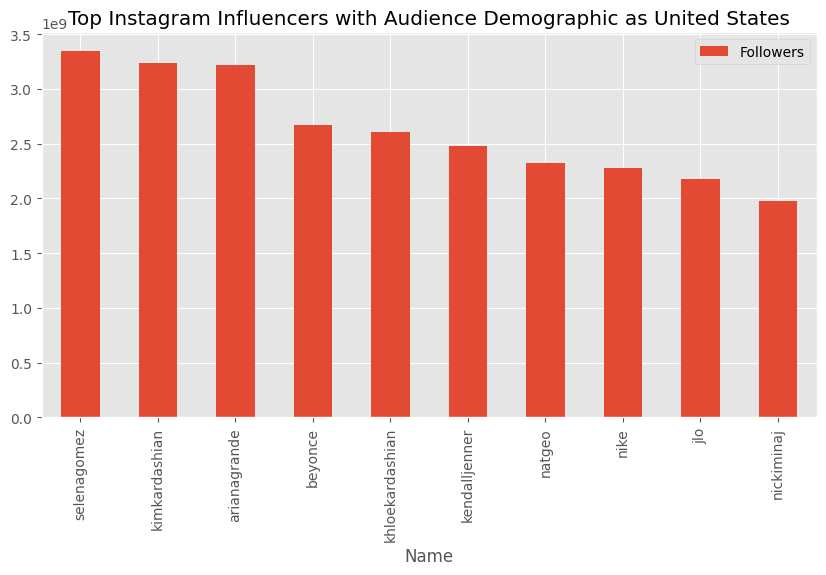

In [410]:
df[df["Audience Country"] == "United States"].sort_values(by="Followers", ascending=False).head(10).plot(\
kind="bar", x="Name", y="Followers", figsize=(10, 5),title="Top Instagram Influencers with Audience Demographic as United States")

In [412]:
df[df["Category"] == "Music"].sort_values(by="Followers", ascending=False).head(10)

,Name,Rank,Category,Followers,Audience Country,Authentic Engagement,Engagement Avg.,suspecious engagement
3,arianagrande,4,Music,3214000000,United States,24000000,34000000,10000000
23,justinbieber,24,Music,2459000000,India,7985000,12000000,4015000
6,taylorswift,7,Music,2182000000,Brazil,24000000,32000000,8000000
27,nickiminaj,28,Music,1978000000,United States,7442000,12000000,4558000
46,mileycyrus,47,Music,1782000000,United States,5578000,7572000,1994000
115,katyperry,116,Music,1672000000,Brazil,1563000,2004000,441000
85,ddlovato,86,Music,1363000000,United States,2645000,3381000,736000
43,champagnepapi,44,Music,1166000000,United States,7536000,12000000,4464000
82,chrisbrownofficial,83,Music,1151000000,United States,267000,4145000,3878000
20,billieeilish,21,Music,1043000000,United States,24000000,31000000,7000000


<Axes: title={'center': 'Top Instagram Influencers in Music'}, xlabel='Name'>

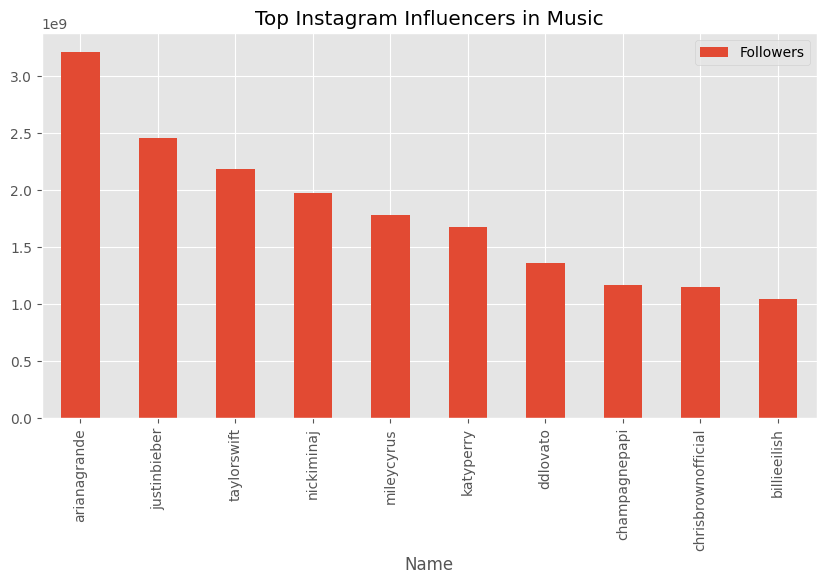

In [413]:
df[df["Category"] == "Music"].sort_values(by="Followers", ascending=False).head(10).plot(kind="bar", \
x="Name", y="Followers", figsize=(10, 5),title="Top Instagram Influencers in Music")

<Axes: title={'center': 'Followers vs Authentic Engagement'}, xlabel='Followers', ylabel='Authentic Engagement'>

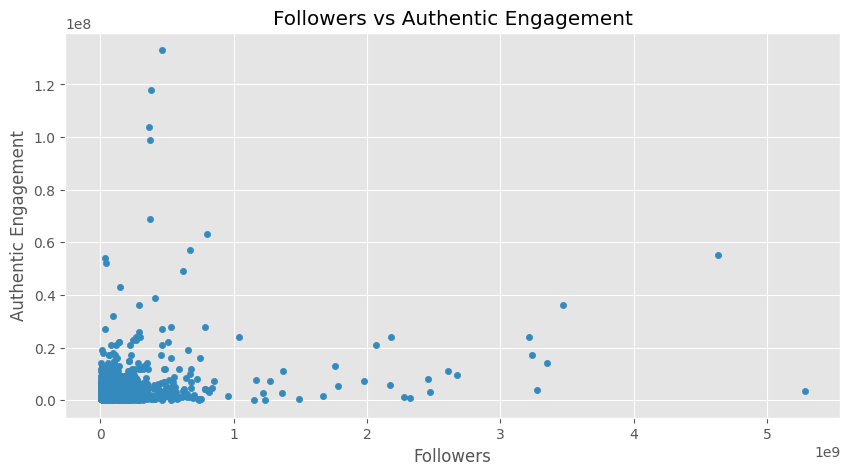

In [422]:
# scatterplot
df.plot(kind="scatter", x="Followers", y="Authentic Engagement", figsize=(10, 5),title="Followers vs Authentic Engagement")

In [425]:
df.corr(numeric_only=True)

,Rank,Followers,Authentic Engagement,Engagement Avg.,suspecious engagement
Rank,1.000000,-0.394610,-0.415378,-0.476916,-0.237582
Followers,-0.394610,1.000000,0.186020,0.217893,0.115338
Authentic Engagement,-0.415378,0.186020,1.000000,0.875899,0.007724
Engagement Avg.,-0.476916,0.217893,0.875899,1.000000,0.489246
suspecious engagement,-0.237582,0.115338,0.007724,0.489246,1.000000


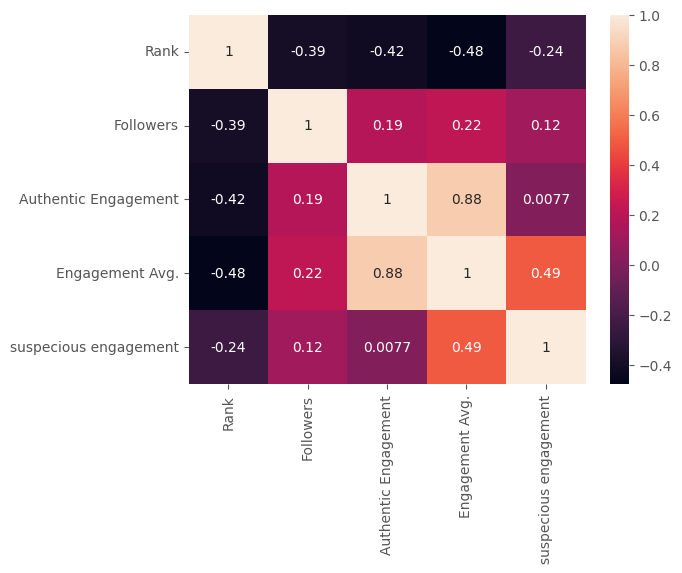

In [424]:
# heatmap correlation
# df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

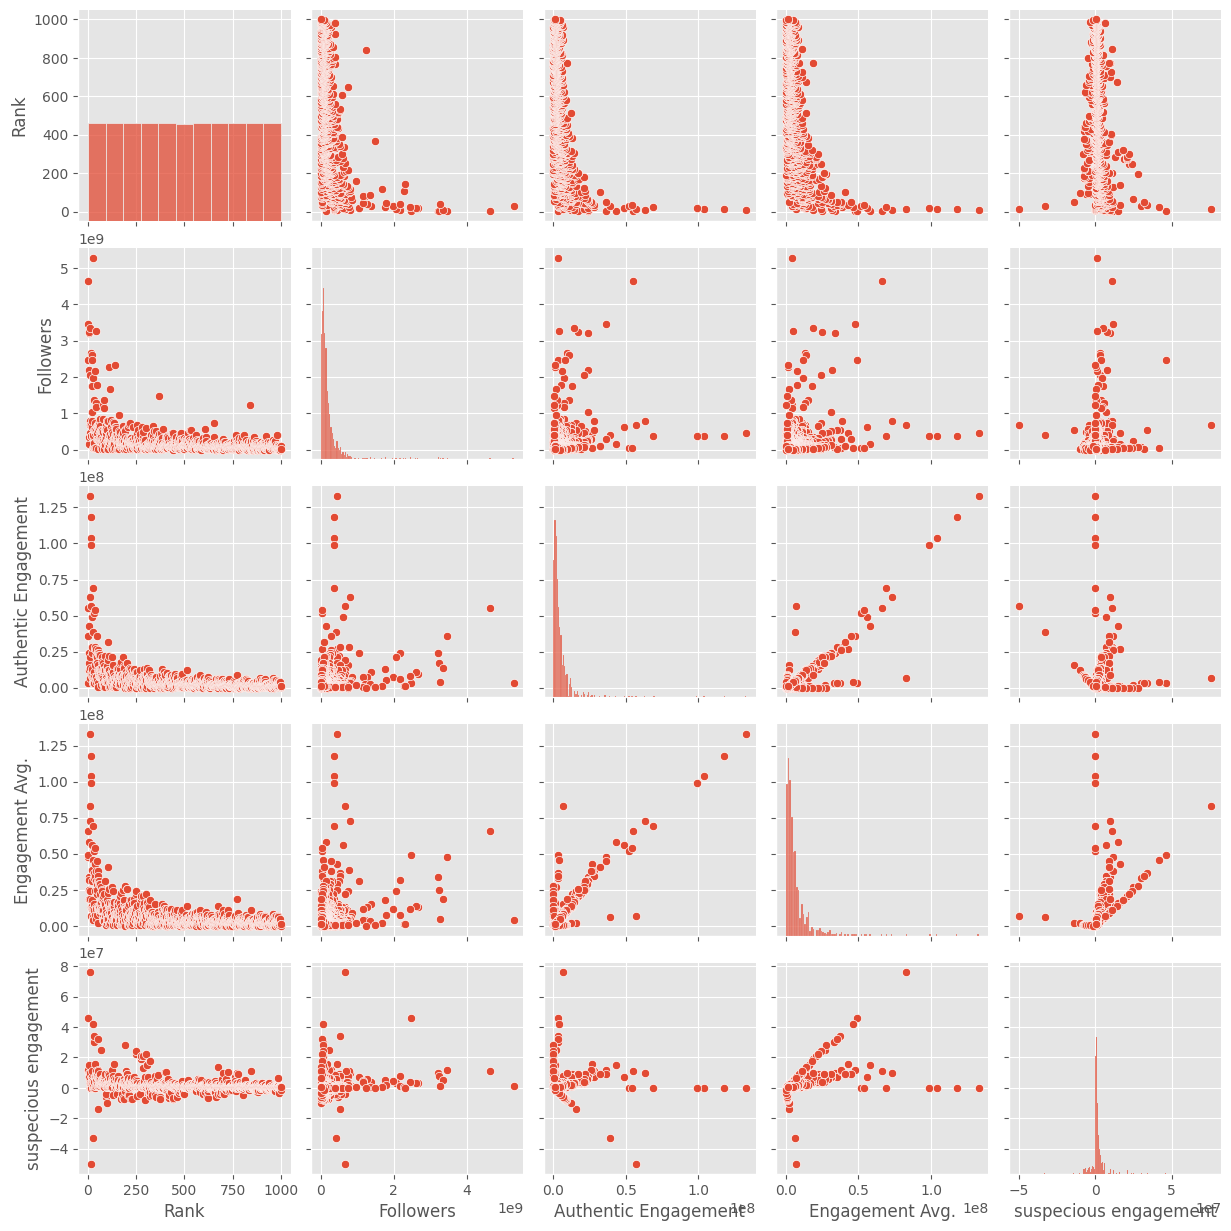

In [426]:
# pairplot
sns.pairplot(df)
plt.show()